In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
data = pd.read_csv('datos_embarazos.csv', sep=";", index_col="id")
data_original = data.copy()
print(len(data))


3329


In [197]:
data.head(10)

,embarazos,partos,cesareas,abortos
id,,,,
1,0.0,NaN,NaN,NaN
2,1.0,1.0,NaN,0.0
3,0.0,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN
5,2.0,2.0,NaN,0.0
6,2.0,2.0,NaN,0.0
7,NaN,NaN,NaN,NaN
8,2.0,2.0,0.0,0.0
9,6.0,4.0,NaN,2.0


In [198]:
# Filtrar las filas donde el valor de columna_1 es 1 o mayor
filas_con_valor_al_menos_uno = data[data['embarazos'] >= 1]

# Calcular la mediana de la columna_1 para las filas filtradas
mediana_embarazo_1 = filas_con_valor_al_menos_uno['embarazos'].median()



In [ ]:
for indice, fila in data.iterrows():

    if fila[0] <  0:
        data.iloc[indice - 1, 1] = mediana_embarazo_1
        fila[0] = mediana_embarazo_1

    if fila[0] == 0:
        # print(indice, fila)
        data.iloc[indice - 1][1:] = [0,0,0]

    elif sum(fila[1:].fillna(0)) == fila[0]:
        data.iloc[indice - 1, 1:] = data.iloc[indice - 1, 1:].fillna(0)

    elif pd.isnull(fila[0]) and not fila[1:].isnull().any():
        data.iloc[indice - 1, 0] = fila[1:].sum()
    
    if not fila[:].isnull().any() and sum(fila[1:].fillna(0)) - fila[0] != 0:
        # print(indice - 1, " inconsistencia")
        if fila[1] == fila[2] == fila[0] - fila[3]:
            data.iloc[indice - 1, 1] = 0
        else:
            data.iloc[indice - 1, :] =  [pd.NA, pd.NA, pd.NA, pd.NA]
        

In [200]:
print(data.iloc[1364, :])
print(data_original.iloc[1364,:])

embarazos   NaN
partos      NaN
cesareas    NaN
abortos     NaN
Name: 1365, dtype: float64
embarazos    2.0
partos       2.0
cesareas     0.0
abortos      2.0
Name: 1365, dtype: float64


In [201]:
# Contar el número de filas con un solo valor nulo
filas_con_un_nulo = data.isnull().sum(axis=1) >= 1
cantidad_filas_con_un_nulo = filas_con_un_nulo.sum()

print(f'Número de filas con un solo valor nulo: {cantidad_filas_con_un_nulo}')


Número de filas con un solo valor nulo: 1331


In [202]:
data.describe()

,embarazos,partos,cesareas,abortos
count,2075.000000,2044.000000,2012.000000,2040.000000
mean,2.408193,2.012231,0.108350,0.306863
std,1.179882,1.013056,0.474292,0.710706
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,0.000000,0.000000
max,15.000000,8.000000,7.000000,8.000000


In [203]:
# Encontrar valores nulos en cada columna
nulos_por_columna = data.isnull().sum()

# Imprimir el número de valores nulos por columna
print('Número de valores nulos por columna:')
print(nulos_por_columna)

Número de valores nulos por columna:
embarazos    1254
partos       1285
cesareas     1317
abortos      1289
dtype: int64


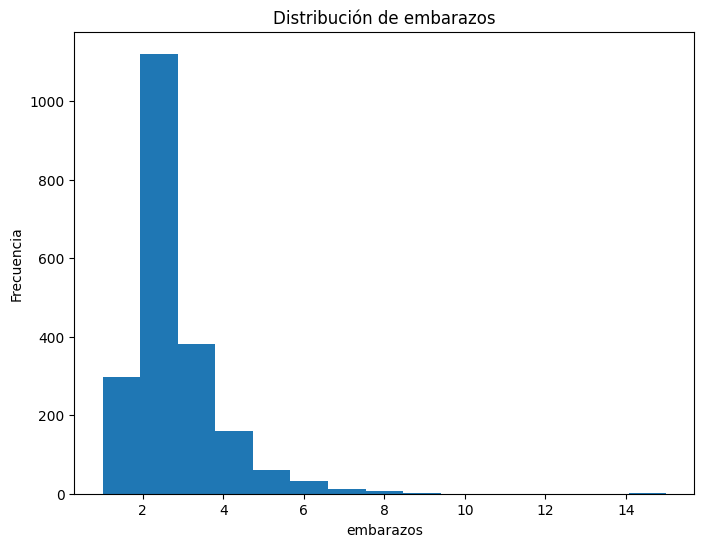

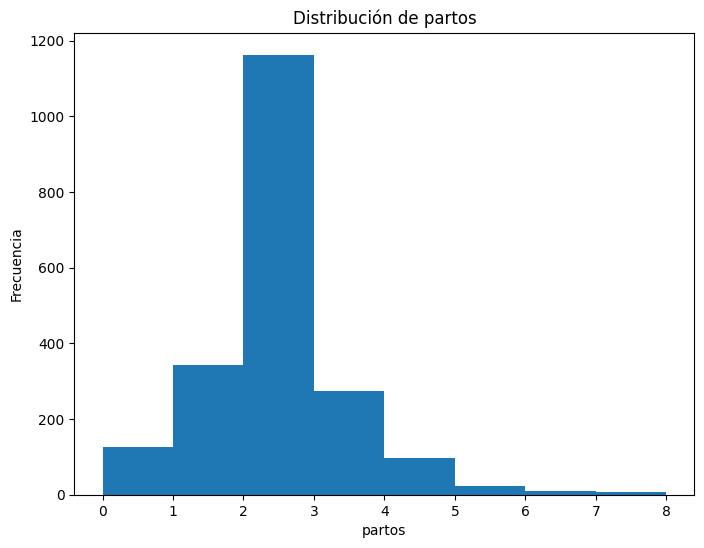

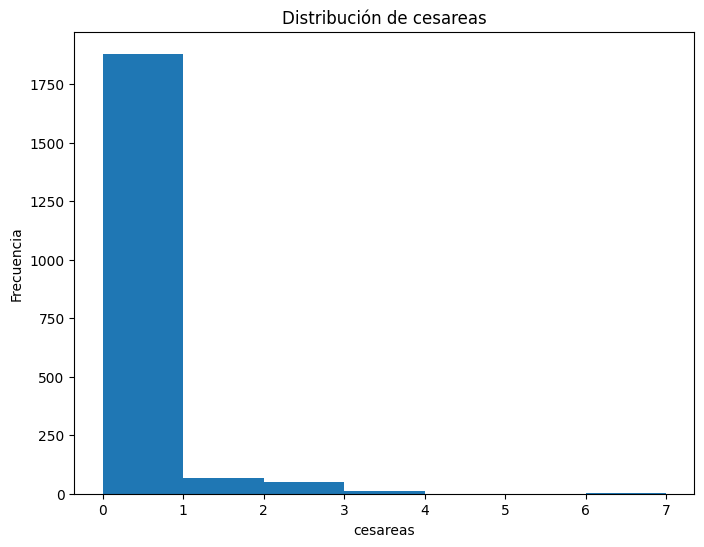

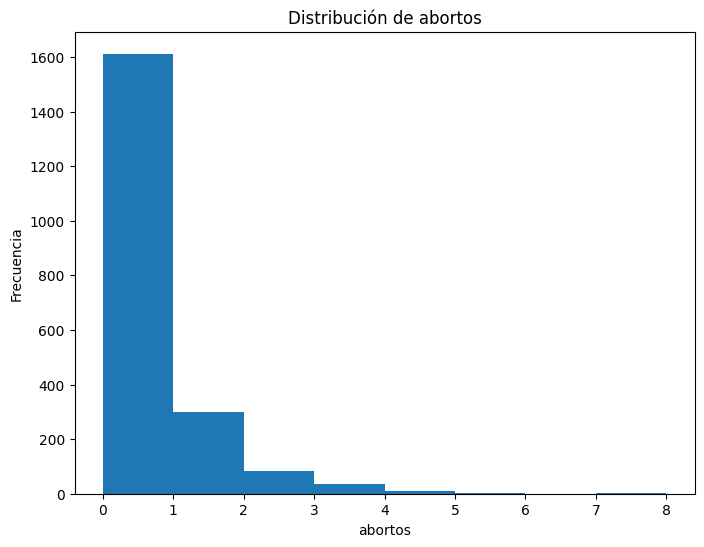

In [204]:
# Visualizar la distribución de características numéricas en un histograma sin separación entre las barras
for columna in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[columna].dropna(), bins = int(max(data[columna].dropna()))) # , bins=20)# , width=(data[columna].max() - data[columna].min()) / 20)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()
